### Load Array of Feature Vectors

In [228]:
import numpy as np
import json
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.neighbors import NearestNeighbors

path_to_img = '../test_images'
image_arrays = [f for f in listdir(path_to_img)] # contains both jpg and npy
jpg_of_images = [jpg for jpg in image_arrays if jpg.endswith(".jpg")]
npy_of_images = [npy for npy in image_arrays if npy.endswith('.npy')]
jpg_of_images.sort()
npy_of_images.sort()

list_of_feat_vecs = []
for jpg in jpg_of_images:
    list_of_feat_vecs.append(np.load("../test_images/{}_np.npy".format(jpg)))
    
image_dict = {}
for i in jpg_of_images:
    image_dict['{}'.format(i)]=np.load("../test_images/{}_np.npy".format(i))
    
feat_vecs = list(image_dict.values())
data = np.array(feat_vecs)

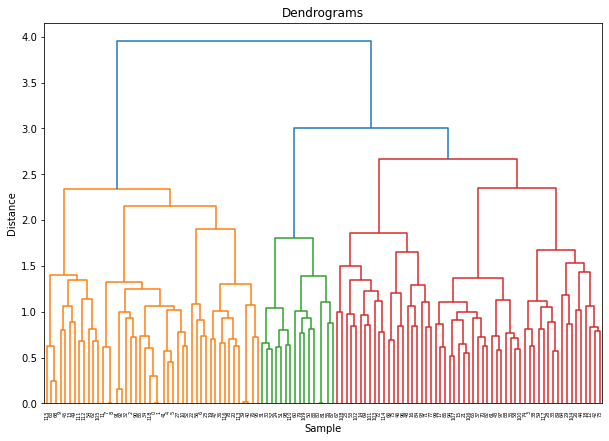

In [230]:
### Divisive Hierarchal Clustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics.pairwise import pairwise_distances
import sys
%matplotlib inline

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

data_scaled = normalize(data)


plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.ylabel("Distance")
plt.xlabel("Sample")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))



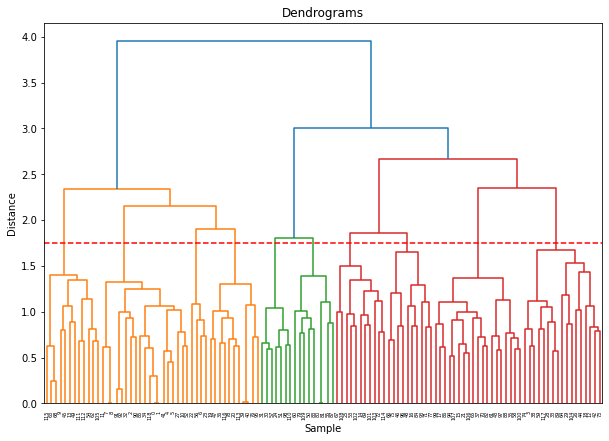

In [231]:
# The number of clusters will be the number of vertical lines which are being 
# intersected by the line drawn using the threshold. 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.ylabel("Distance")
plt.xlabel("Sample")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.75, color='r', linestyle='--')

In [232]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([6, 6, 6, 0, 6, 6, 7, 6, 6, 5, 6, 6, 0, 5, 1, 4, 2, 4, 0, 8, 8, 4,
       7, 7, 9, 1, 0, 6, 0, 0, 9, 9, 6, 0, 6, 4, 8, 4, 0, 8, 8, 6, 0, 4,
       0, 5, 2, 8, 2, 5, 3, 9, 6, 1, 5, 3, 7, 9, 4, 0, 3, 4, 5, 5, 0, 4,
       2, 1, 5, 1, 4, 2, 1, 0, 0, 2, 8, 2, 8, 3, 3, 3, 4, 3, 2, 6, 4, 3,
       4, 0, 6, 6, 6, 2, 4, 8, 2, 4, 9, 4, 4, 1, 1, 1, 0, 5, 4, 4, 1, 3,
       9, 5, 5, 8, 1, 5, 8, 0, 6])

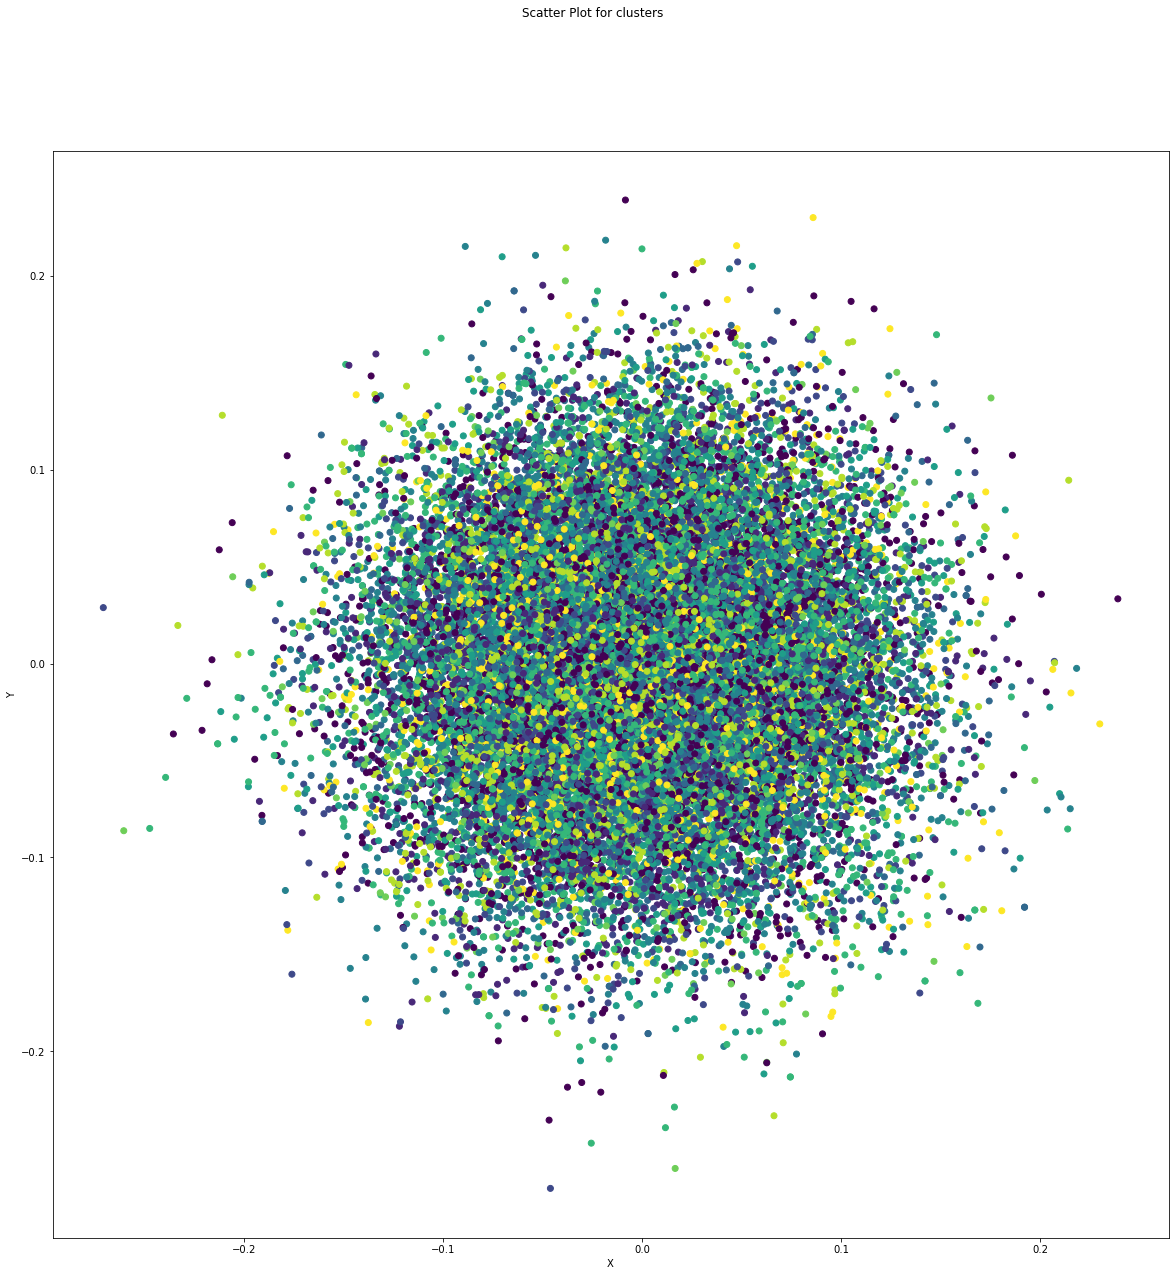

In [247]:
fig = plt.figure()
fig.set_size_inches(20,20)
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y') 

for num in range(255):
    ax.scatter(data[:,num], data[:,num+1], c=cluster.labels_)
    num+=1


# ax.scatter(data[:,0],data[:,1], c=cluster.labels_) # should go up to [:,256]
# ax.scatter(data[:,2],data[:,3], c=cluster.labels_) # should go up to [:,256]

In [234]:
from sklearn.decomposition import PCA

pca_dims = PCA()
pca_dims.fit(data)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(data)
X_recovered = pca.inversbbe_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (119, 37)
recovered shape: (119, 256)


ValueError: cannot reshape array of size 256 into shape (480,300)

In [35]:
### PCA

def pca(X):
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    assert np.allclose(X.mean(axis=0), np.zeros(m))
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return X_pca


In [36]:

def svd(X):
    # Data matrix X, X doesn't need to be 0-centered
    n, m = X.shape
    # Compute full SVD
    U, Sigma, Vh = np.linalg.svd(X, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
    # Transform X with SVD components
    X_svd = np.dot(U, np.diag(Sigma))
    return X_svd

In [37]:


# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)
# SVD
U, Sigma, Vh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)
# Relationship between singular values and eigen values:
print(np.allclose(np.square(Sigma) / (n - 1), eigen_vals)) # True


NameError: name 'X' is not defined

In [38]:
# tsne

In [39]:
### auto encoder
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'